In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/home/akupalo/informationviz/data/share-of-urban-population-living-in-slums.csv")

# Display basic info
print(df.info())

# Display first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Entity                                                                     2351 non-null   object 
 1   Code                                                                       2144 non-null   object 
 2   Year                                                                       2351 non-null   int64  
 3   11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM  2351 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 73.6+ KB
None
        Entity Code  Year  \
0  Afghanistan  AFG  2006   
1  Afghanistan  AFG  2008   
2  Afghanistan  AFG  2010   
3  Afghanistan  AFG  2012   
4  Afghanistan  AFG  2014   

   11.1.1 - Proportion of u

In [21]:
# Convert 'Rural population' to numeric (it appears to be stored as a string)
df["11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM"] = pd.to_numeric(df["11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM"], errors="coerce")

# List of European country codes (ISO Alpha-3 codes)
european_countries = [
    "ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CYP", "CZE", "DNK",
    "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA", "LVA", "LTU",
    "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD", "NOR", "POL", "PRT", "ROU",
    "RUS", "SMR", "SRB", "SVK", "SVN", "ESP", "SWE", "CHE", "UKR", "GBR", "VAT"
]

# Filter dataset for European countries
df_europe = df[df["Code"].isin(european_countries)]

# Pivot the data: Countries as rows, Years as columns (Urban Population values)
heatmap_data = df_europe.pivot(index="Entity", columns="Year", values="11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM")

# Display the first few rows of the pivoted dataset
heatmap_data.head()


Year,1999,2000,2002,2004,2006,2008,2009,2010,2012,2014,2016,2018,2019,2020,2022
Entity,,,,,,,,,,,,,,,
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00
Austria,NaN,4.5,4.4,4.4,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
Belarus,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Belgium,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00
Bosnia and Herzegovina,NaN,5.1,5.1,5.1,4.9,4.7,NaN,4.5,4.3,4.0,4.0,4.0,NaN,0.31,0.31


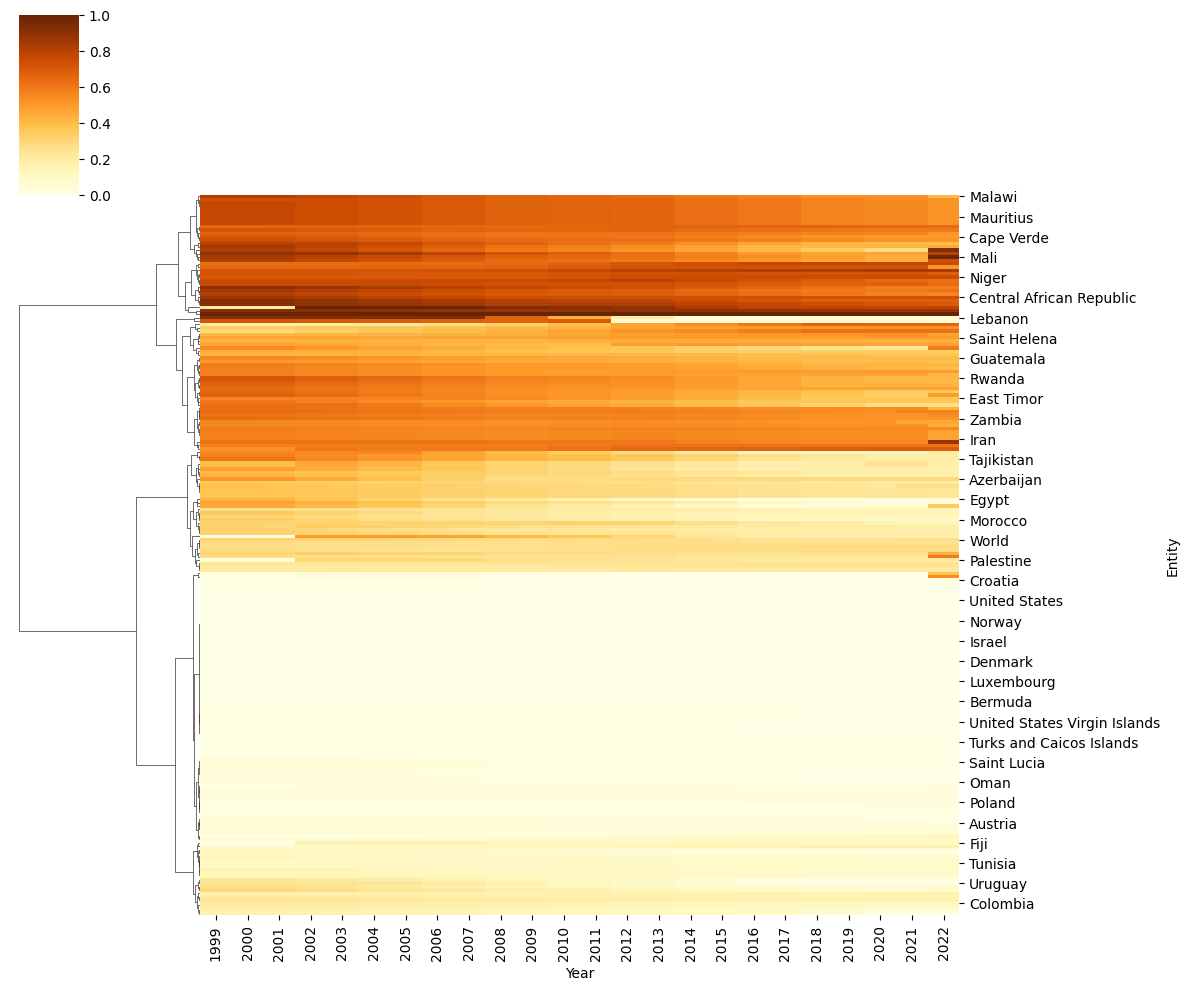

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("/home/akupalo/informationviz/data/share-of-urban-population-living-in-slums.csv")

# Pivot the data: Countries as rows, Years as columns
heatmap_data = df.pivot(index="Entity", columns="Year", values="11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM")

# Step 1: Fill missing values using forward fill (ffill) or backward fill (bfill)
# You can choose either ffill or bfill based on your preference
heatmap_data_filled = heatmap_data.ffill(axis=1).bfill(axis=1)

# Alternatively, you can use interpolation
# heatmap_data_filled = heatmap_data.interpolate(axis=1)

# Step 2: Drop countries with too many missing values (e.g., more than 50% missing)
threshold = 0.5 * len(heatmap_data_filled.columns)
heatmap_data_filled = heatmap_data_filled.dropna(thresh=threshold)

# Step 3: Normalize the data for better clustering
scaler = MinMaxScaler()
heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data_filled),
    index=heatmap_data_filled.index,
    columns=heatmap_data_filled.columns
)

# Step 4: Create a Seaborn clustermap (Cluster only countries, keep years sequential)
sns.clustermap(
    heatmap_data_scaled,
    cmap="YlOrBr",
    figsize=(12, 10),
    method="ward",
    metric="euclidean",
    standard_scale=1,
    row_cluster=True,  # Cluster only countries
    col_cluster=False,  # Keep years in order
    linewidths=0,
    linecolor="gray"
)

# Show the plot
plt.show()

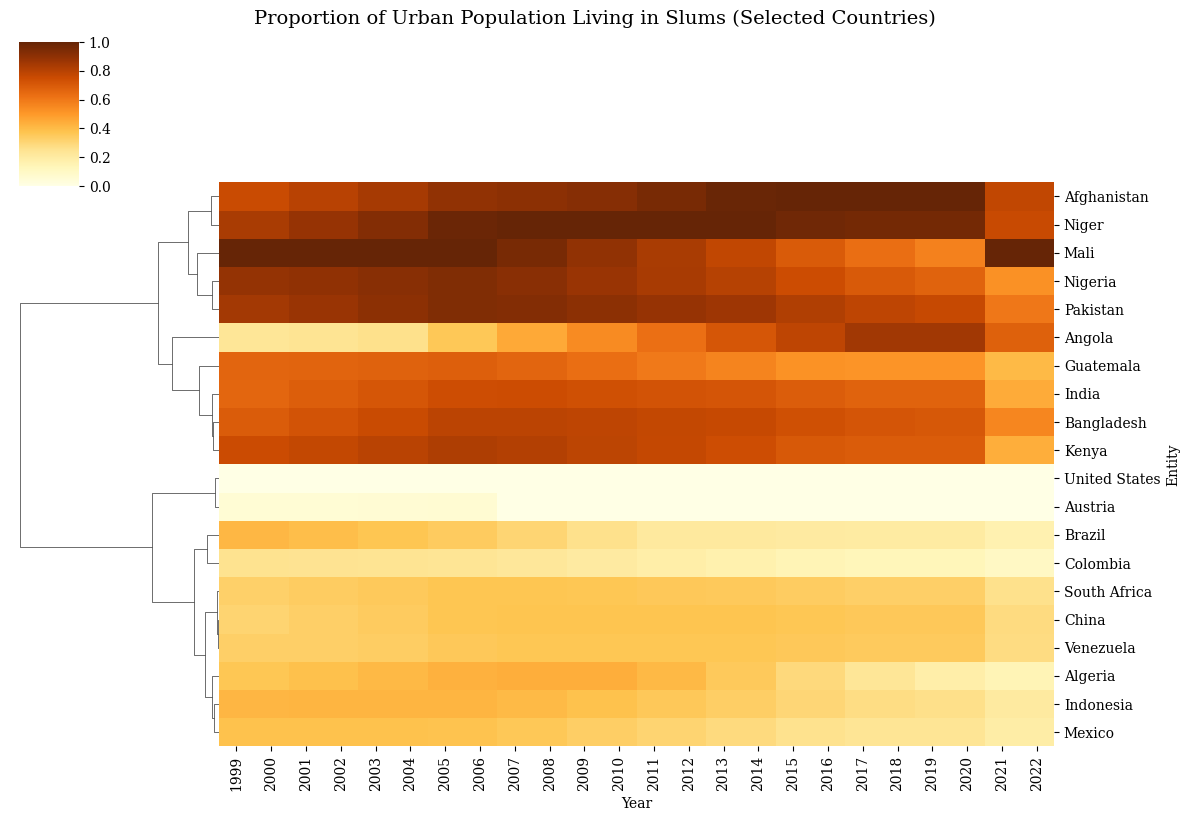

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['font.family'] = 'serif'
# Load the dataset
df = pd.read_csv("/home/akupalo/informationviz/data/share-of-urban-population-living-in-slums.csv")

# Pivot the data: Countries as rows, Years as columns
heatmap_data = df.pivot(index="Entity", columns="Year", values="11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM")

# Step 1: Select 10 to 15 countries of interest
# Replace this list with the countries you want to visualize
selected_countries = [
    "Afghanistan", "Algeria", "Angola", "Bangladesh",
    "Brazil", "China", "India", "Indonesia", "Kenya",
    "Mexico", "Nigeria", "Pakistan", "South Africa", "Mali", "Niger", "United States", "Colombia", "Guatemala", "Austria", "Venezuela"
]

# Filter the data to include only the selected countries
heatmap_data_filtered = heatmap_data.loc[selected_countries]

# Step 2: Fill missing values using forward fill (ffill) or backward fill (bfill)
# You can choose either ffill or bfill based on your preference
heatmap_data_filled = heatmap_data_filtered.bfill(axis=1)

# Alternatively, you can use interpolation
# heatmap_data_filled = heatmap_data_filtered.interpolate(axis=1)

# Step 3: Normalize the data for better clustering
scaler = MinMaxScaler()
heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data_filled),
    index=heatmap_data_filled.index,
    columns=heatmap_data_filled.columns
)

# Step 4: Create a Seaborn clustermap (Cluster only countries, keep years sequential)
sns.clustermap(
    heatmap_data_scaled,
    cmap="YlOrBr",
    figsize=(12, 8),  # Adjust figure size for better readability
    method="ward",
    metric="euclidean",
    standard_scale=1,
    row_cluster=True,  # Cluster only countries
    col_cluster=False,  # Keep years in order
    linewidths=0,
    linecolor="gray"
)

# Add a title
plt.suptitle("Proportion of Urban Population Living in Slums (Selected Countries)", y=1.02, fontsize=14)

# Show the plot
plt.show()

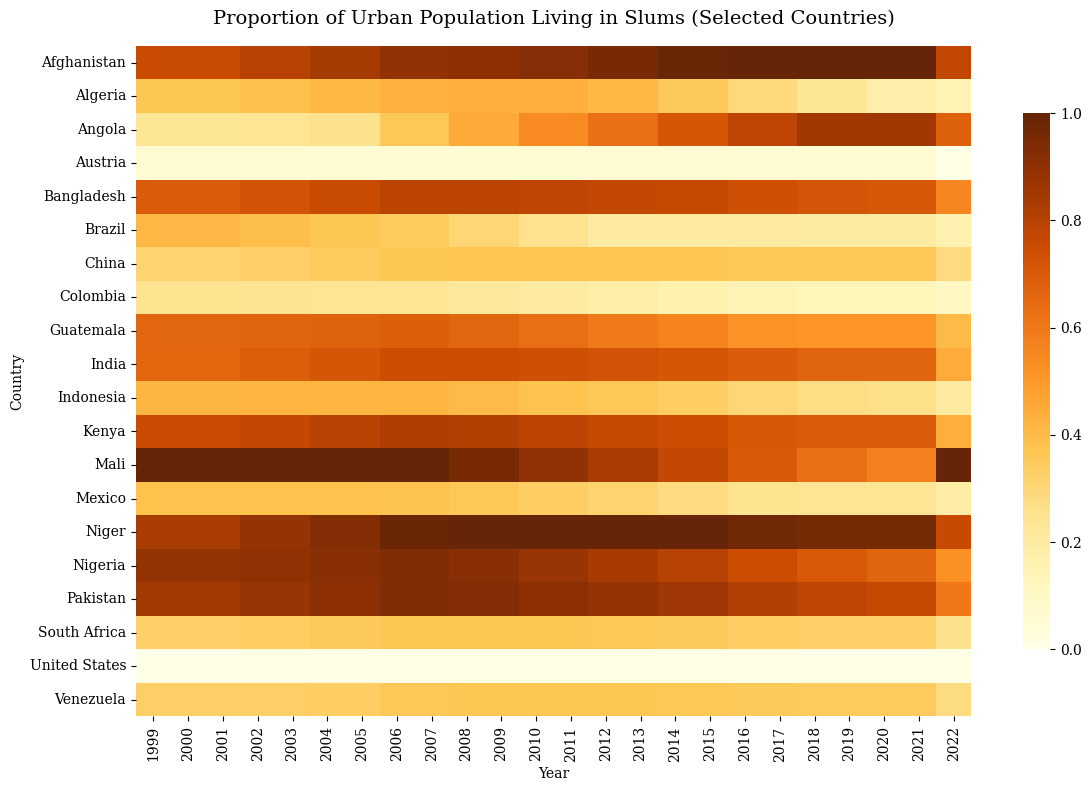

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set font family for the plot
plt.rcParams['font.family'] = 'serif'

# Load the dataset
df = pd.read_csv("/home/akupalo/informationviz/data/share-of-urban-population-living-in-slums.csv")

# Pivot the data: Countries as rows, Years as columns
heatmap_data = df.pivot(index="Entity", columns="Year", values="11.1.1 - Proportion of urban population living in slums (%) - EN_LND_SLUM")

# Step 1: Select 10 to 15 countries of interest
selected_countries = [
    "Afghanistan", "Algeria", "Angola", "Bangladesh",
    "Brazil", "China", "India", "Indonesia", "Kenya",
    "Mexico", "Nigeria", "Pakistan", "South Africa", "Mali", "Niger", 
    "United States", "Colombia", "Guatemala", "Austria", "Venezuela"
]

# Filter the data to include only the selected countries
heatmap_data_filtered = heatmap_data.loc[selected_countries]

# Step 2: Fill missing values using forward fill (ffill) or backward fill (bfill)
heatmap_data_filled = heatmap_data_filtered.ffill(axis=1).bfill(axis=1)

# Step 3: Sort the countries in alphabetical order
heatmap_data_filled = heatmap_data_filled.sort_index(ascending=True)

# Step 4: Normalize the data for better clustering
scaler = MinMaxScaler()
heatmap_data_scaled = pd.DataFrame(
    scaler.fit_transform(heatmap_data_filled),
    index=heatmap_data_filled.index,
    columns=heatmap_data_filled.columns
)

# Step 5: Create a Seaborn heatmap (without clustering rows)
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(
    heatmap_data_scaled,
    cmap="YlOrBr",
    linewidths=0,
    linecolor="gray",
    annot=False,  # Set to True if you want to display values in the heatmap
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)

# Add a title
plt.title("Proportion of Urban Population Living in Slums (Selected Countries)", y=1.02, fontsize=14)
plt.xlabel("Year")
plt.ylabel("Country")

# Show the plot
plt.tight_layout()
plt.show()